# [Computational Social Science] Classification Part 2

## Classification Metrics

We will extend our work from last week to learn more about different classification metrics, as well as some other useful techniques.

## Data
We're going to use our Census Income dataset dataset again for this lab. Load the dataset in, and explore it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
# Create a list of column names, found in "adult.names"
col_names = ['age', 'workclass', 'fnlwgt',
            'education', 'education-num',
            'marital-status', 'occupation', 
             'relationship', 'race', 
             'sex', 'capital-gain',
            'capital-loss', 'hours-per-week',
            'native-country', 'income-bracket']

# Read table from the data folder
census = pd.read_table("../../data/adult.data", sep = ',', names = col_names)
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Remember that before we train machine learning algorithms, we need to preprocess the data. Run the cell below to preprocess the data.

In [3]:
# Target
lb_style = LabelBinarizer()
y = census['income-bracket-binary'] = lb_style.fit_transform(census["income-bracket"])

# Features
X = census.drop(['income-bracket', 'income-bracket-binary'], axis = 1)
X = pd.get_dummies(X)
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Fit a Logistic Regression Model

Before we explore metrics for evaluating classification algorithms, let's train a logistic regression to work with. Do train, test, validation splits, train a logistic regression model on the training set, and make predictions on the validation set.

In [4]:
# Set seed
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .20, 
                                                           stratify = y_train)

In [5]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

y_pred = logit_model.predict(X_validate)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Accuracy

Recall the metrics we defined last week: **True Positives (TP)**, **False Positives (FP)**, **True Negatives (TN)**, and **False Negatives (FN)**. Accuracy can be expressed as:

$$
Accuracy = \frac{TP + TN}{TP + FN + FP + FN}
$$

In plain language, what does this formula represent?

**Answer**: The numerator is the number of correction predictions regardless of direction, divided by the total number observations (correct predictions + incorrect predictions).

Write code to calculate the accuracy of your logistic regression. Calculate the number of true positives, false positives, true negatives, and false negatives and then calculate and print the accuracy.

In [6]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(y_pred)): 
    if y_validate[i]==y_pred[i]==1:
       TP += 1
    if y_pred[i]==1 and y_validate[i]!=y_pred[i]:
       FP += 1
    if y_validate[i]==y_pred[i]==0:
       TN += 1
    if y_pred[i]==0 and y_pred[i]!=y_validate[i]:
       FN += 1

In [7]:
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.800383877159309


## Precision

Precision is a measure of how well calibrated predictions are. The formula for precision is:

$$
Precision = \frac{TP}{TP + FP}
$$

**Question**: In plain language, what does this formula tell us?

**Answer**: This formula tell us of the predictions in the positive class (">50k" in this case) we made, how many were correct.

Calculate and print the precision for the logistic regression.

In [8]:
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.7296137339055794


## Recall

Recall is defined as:

$$
Recall = \frac{TP}{TP + FN}
$$

**Question**: In plain language, what does the formula tell us?

**Answer**: Of all of the positive class members in the ground truth labels, how many did we successfully predict as positive?

Calculate the recall for our logistic regression model.

In [9]:
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.2711323763955343


**Question**: How did we do on precision and recall? Could you optimize for one or the other?

**Answer**: We did pretty good on precision, but not great on recall. We could try to improve recall by guessing more in the positive class, but this would reduce precision if we made lots of incorrect predictions. At the extremes, we could get to a recall of 1 by guessing "1" for each prediction, or a precision of 1 by making exactly one correct true positive prediction and stopping. However, these extremes are unlikely to be helpful in an applied social science context.

## F1 Score

The precision-recall tradeoff can be managed in a few different ways. One popular metric is the F1 score. It is defined as:

$$
F1 = 2 * \frac{precision * recall}{precision + recall}
$$

Calculate and print the f1 score.

In [10]:
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.3953488372093023


**Question**: How does F1 trade off between precision and recall? What are the advantages and disadvantages?

**Answer**: F1 is advantageous because the numerator can be penalized by either low precision OR recall. The disadvantage of this approach is that without adjustments, the F1 score prioritizes precision and recall equally. Depending on the application, we might care about one more than the other.

## AUC-ROC

[Area Under the Curve - Receiver Operating Characteristic (AUC-ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a popular method for seeing how well an algorithm does at separating between two classes. It is calculated by plotting the True Positive Rate against the False Positive Rate. Let's define these quantities:

$$
True \space Positive \space Rate(TPR) = Sensitivity = \frac{TP}{TP + FN}
$$

Hm, this formula looks familiar. In fact, it is exactly the same as Recall! Meanwhile, the False Positive Rate is:

$$
False \space Positive \space Rate (FPR) = 1 - Specificity = \frac{FP}{TN + FP}
$$

**Question**: Why does plotting TPR against FPR express separability between class labels?

**Answer**: By comparing TPR to FPR, we can see how well a model does at detecting the positive class. A TPR of 1 and a FPR of 0 would imply that the model does a perfect job at classifying positives as positives and negatives as negatives. It basically contextualizes Recall.

Fill in the following code to plot the AUC-ROC for the logistic regression and a "no skill" model. Make sure to look up documentation as necessary.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.597


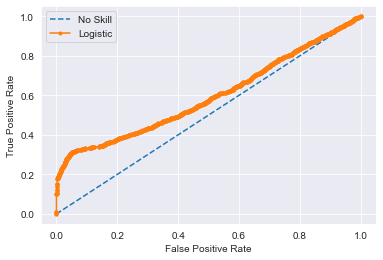

In [13]:
# roc curve and auc

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]


# predict probabilities for logistic regression
lr_probs = logit_model.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Question**: How did the logistic regression do on the AUC-ROC metric? Compared to the "no skill" decision rule, was it a meaningful improvement?

**Answer**: The logit regression does slightly better than the "no skill" method, but not by much.

## Over and Under Sampling

We have seen that imbalanced data can cause all sorts of problems and give us misleading results, especially if we only focus on accuracy. How can we correct for these problems? One simple method is to **resample** the data. For example, you might **oversample** the minority class or **undersample** the majority class. Let's use the [**imblearn**](https://imbalanced-learn.readthedocs.io/en/stable/api.html) to try this out. First, you might need to run the cell below to install the library. Anytime you use "!" in a Jupyter notebook, this will actually run a bash command.

In [16]:
#!pip install imblearn

Now let's import the RandomOverSampler and RandomUnderSampler methods. Then take a look at the first 15 values in y_train before we resample.

**Question**: Why would we resample the training set, instead of the dataset or the validation/test sets?

**Answer**: We want our evaluations to be as close to reality as possible. If the actual social science or policy problem has imbalanced class labels, we don't want to make an algorithm look artificially good by validating and testing in a resampled dataset that does not resemble the ground truth.

In [17]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [42]:
y_train[0:15]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]])

Next use either the RandomOverSampler or RandomUnderSampler to resample the training set.

In [43]:
random_over_sampler = RandomOverSampler(sampling_strategy=0.5)
random_under_sampler = RandomUnderSampler(sampling_strategy=0.5)

X_train_new, y_train_new = random_over_sampler.fit_resample(X_train, y_train)

Check the training labels again. Did anything change?

In [44]:
y_train_new[0:15]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

**Question**: What do you notice about the resampled training targets? What might be some issues with over and undersampling?

**Answer**: The new targets have more instances of the positive class. Random over and undersampling could be a problem because it could force a model to overtrain on idiosyncrasies in the training data in the case of oversampling, or throw away useful information in the case of undersampling.

Retrain the logistic regression model on the newly resampled data. How does AUC-ROC change?

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.651


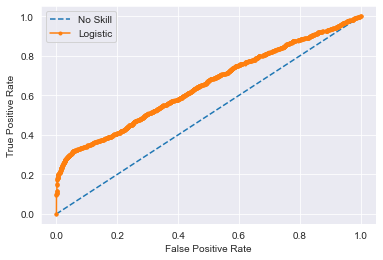

In [45]:
# fit the model
logit_model = logit_reg.fit(X_train_new, y_train_new)

y_pred = logit_model.predict(X_validate)

# roc curve and auc

# split into train/test sets
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_validate))]


# predict probabilities for logistic regression
lr_probs = logit_model.predict_proba(X_validate)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_validate, ns_probs)
lr_auc = roc_auc_score(y_validate, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_validate, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_validate, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Answer**: Looks like we did a little bit better!

Overall, while sklearn puts together many of the methods we need to train, predict, and visualize the results of our machine learning, there are a lot of substantive choices involved. As you can see, even a slightly imbalanced dataset can cause problems. If you optimize only on accuracy, you might miss relevant aspects of the problem. Be mindful of the various metrics available, and decide which ones best answer the scientific question you have in mind.

---
Authored by Aniket Kesari.